<a href="https://colab.research.google.com/github/Archanatshinod/Data_science_and_Machine_Learning/blob/main/Flight_delay_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import seaborn as sns


In [41]:
train_set=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/flight_delays_train.csv')

In [42]:
test_set=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/flight_delays_test.csv')

In [4]:
print("------TRAINING SET------")
print(train_set)

------TRAINING SET------
      Month DayofMonth DayOfWeek  DepTime UniqueCarrier Origin Dest  Distance  \
0       c-8       c-21       c-7     1934            AA    ATL  DFW       732   
1       c-4       c-20       c-3     1548            US    PIT  MCO       834   
2       c-9        c-2       c-5     1422            XE    RDU  CLE       416   
3      c-11       c-25       c-6     1015            OO    DEN  MEM       872   
4      c-10        c-7       c-6     1828            WN    MDW  OMA       423   
...     ...        ...       ...      ...           ...    ...  ...       ...   
99995   c-5        c-4       c-3     1618            OO    SFO  RDD       199   
99996   c-1       c-18       c-3      804            CO    EWR  DAB       884   
99997   c-1       c-24       c-2     1901            NW    DTW  IAH      1076   
99998   c-4       c-27       c-4     1515            MQ    DFW  GGG       140   
99999  c-11       c-17       c-4     1800            WN    SEA  SMF       605   

  

In [5]:
print(train_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB
None


In [6]:
print(train_set.head(5))

  Month DayofMonth DayOfWeek  DepTime UniqueCarrier Origin Dest  Distance  \
0   c-8       c-21       c-7     1934            AA    ATL  DFW       732   
1   c-4       c-20       c-3     1548            US    PIT  MCO       834   
2   c-9        c-2       c-5     1422            XE    RDU  CLE       416   
3  c-11       c-25       c-6     1015            OO    DEN  MEM       872   
4  c-10        c-7       c-6     1828            WN    MDW  OMA       423   

  dep_delayed_15min  
0                 N  
1                 N  
2                 N  
3                 N  
4                 Y  


In [7]:
print("------TESTING SET------")
print(test_set)

------TESTING SET------
      Month DayofMonth DayOfWeek  DepTime UniqueCarrier Origin Dest  Distance
0       c-7       c-25       c-3      615            YV    MRY  PHX       598
1       c-4       c-17       c-2      739            WN    LAS  HOU      1235
2      c-12        c-2       c-7      651            MQ    GSP  ORD       577
3       c-3       c-25       c-7     1614            WN    BWI  MHT       377
4       c-6        c-6       c-3     1505            UA    ORD  STL       258
...     ...        ...       ...      ...           ...    ...  ...       ...
99995   c-6        c-5       c-2      852            WN    CRP  HOU       187
99996  c-11       c-24       c-6     1446            UA    ORD  LAS      1515
99997   c-1       c-30       c-2     1509            OO    ORD  SGF       438
99998   c-1        c-5       c-5      804            DL    LGA  ATL       761
99999  c-10       c-29       c-1      834            OO    MKE  MSP       297

[100000 rows x 8 columns]


In [8]:
print(test_set.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Month          100000 non-null  object
 1   DayofMonth     100000 non-null  object
 2   DayOfWeek      100000 non-null  object
 3   DepTime        100000 non-null  int64 
 4   UniqueCarrier  100000 non-null  object
 5   Origin         100000 non-null  object
 6   Dest           100000 non-null  object
 7   Distance       100000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 6.1+ MB
None


In [9]:
print(test_set.tail(3))

      Month DayofMonth DayOfWeek  DepTime UniqueCarrier Origin Dest  Distance
99997   c-1       c-30       c-2     1509            OO    ORD  SGF       438
99998   c-1        c-5       c-5      804            DL    LGA  ATL       761
99999  c-10       c-29       c-1      834            OO    MKE  MSP       297


In [73]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
categorical_cols = ['Month','DayofMonth','DayOfWeek', 'UniqueCarrier','Origin','Dest','dep_delayed_15min']
train_set[categorical_cols] = enc.fit_transform(train_set[categorical_cols])
print(train_set)


       Month  DayofMonth  DayOfWeek  DepTime  UniqueCarrier  Origin   Dest  \
0       10.0        13.0        6.0     1934            0.0    18.0   78.0   
1        6.0        12.0        2.0     1548           18.0   217.0  171.0   
2       11.0        11.0        4.0     1422           20.0   228.0   59.0   
3        2.0        17.0        5.0     1015           15.0    78.0  175.0   
4        1.0        28.0        5.0     1828           19.0   174.0  199.0   
...      ...         ...        ...      ...            ...     ...    ...   
99995    7.0        25.0        2.0     1618           15.0   246.0  224.0   
99996    0.0         9.0        2.0      804            4.0    92.0   72.0   
99997    0.0        16.0        1.0     1901           13.0    85.0  131.0   
99998    6.0        19.0        3.0     1515           12.0    79.0  107.0   
99999    2.0         8.0        3.0     1800           19.0   245.0  253.0   

       Distance  dep_delayed_15min  
0           732           

In [74]:
ens = OrdinalEncoder()
categorical_cols = ['Month','DayofMonth','DayOfWeek', 'UniqueCarrier','Origin','Dest']
test_set[categorical_cols] = ens.fit_transform(test_set[categorical_cols])
print(test_set)

       Month  DayofMonth  DayOfWeek  DepTime  UniqueCarrier  Origin   Dest  \
0        9.0        17.0        2.0      615           19.0   194.0  217.0   
1        6.0         8.0        1.0      739           17.0   155.0  129.0   
2        3.0        11.0        6.0      651           11.0   121.0  208.0   
3        5.0        17.0        6.0     1614           17.0    49.0  183.0   
4        8.0        27.0        2.0     1505           15.0   209.0  270.0   
...      ...         ...        ...      ...            ...     ...    ...   
99995    8.0        26.0        1.0      852           17.0    70.0  129.0   
99996    2.0        16.0        5.0     1446           15.0   209.0  154.0   
99997    0.0        23.0        1.0     1509           14.0   209.0  254.0   
99998    0.0        26.0        4.0      804            6.0   162.0   19.0   
99999    1.0        21.0        0.0      834           14.0   186.0  196.0   

       Distance  
0           598  
1          1235  
2        

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_set,test_set,test_size=0.25,random_state=42)


In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [77]:
y_pred1= knn.predict(x_test)
y_pred1

array([[  6.,   7.,   1., ...,  27.,  49., 109.],
       [  0.,   2.,   6., ...,  63.,  21.,  83.],
       [  0.,  13.,   0., ...,  87., 196., 528.],
       ...,
       [  1.,   7.,   0., ...,   0.,  19., 304.],
       [  8.,   6.,   1., ...,  92., 154., 236.],
       [  8.,  29.,   3., ...,  38.,  63., 370.]])

In [78]:
acc1 = accuracy_score(y_test,y_pred1)
print("Accuracy of KNN Algorithm:", acc1)

ValueError: multiclass-multioutput is not supported

In [88]:
x = train_set.iloc[:,:-1]
print(x)

       Month  DayofMonth  DayOfWeek  DepTime  UniqueCarrier  Origin   Dest  \
0       10.0        13.0        6.0     1934            0.0    18.0   78.0   
1        6.0        12.0        2.0     1548           18.0   217.0  171.0   
2       11.0        11.0        4.0     1422           20.0   228.0   59.0   
3        2.0        17.0        5.0     1015           15.0    78.0  175.0   
4        1.0        28.0        5.0     1828           19.0   174.0  199.0   
...      ...         ...        ...      ...            ...     ...    ...   
99995    7.0        25.0        2.0     1618           15.0   246.0  224.0   
99996    0.0         9.0        2.0      804            4.0    92.0   72.0   
99997    0.0        16.0        1.0     1901           13.0    85.0  131.0   
99998    6.0        19.0        3.0     1515           12.0    79.0  107.0   
99999    2.0         8.0        3.0     1800           19.0   245.0  253.0   

       Distance  
0           732  
1           834  
2        

In [95]:
y = train_set.iloc[:,-1].values
print(y)

[0. 0. 0. ... 0. 0. 0.]


In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [98]:
y_pred1= knn.predict(x_test)
y_pred1

array([0., 0., 0., ..., 1., 0., 0.])

In [99]:
acc1 = accuracy_score(y_test,y_pred1)
print("Accuracy of KNN Algorithm:", acc1)

Accuracy of KNN Algorithm: 0.79944


In [110]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
cnn1=confusion_matrix(y_pred1,y_test)

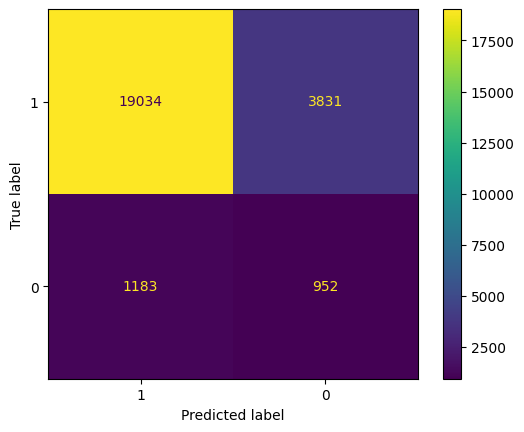

In [102]:
out=[1,0]
cndis1=ConfusionMatrixDisplay(cnn1,display_labels=out)
cndis1.plot()

In [111]:
from sklearn.linear_model import LogisticRegression
model2= LogisticRegression()
model2.fit(x_train,y_train)
cnn2=confusion_matrix(y_pred1,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
acc2 = accuracy_score(y_test,y_pred2)
print("Accuracy of logistic Regression Algorithm:", acc2)

Accuracy of logistic Regression Algorithm: 0.80596


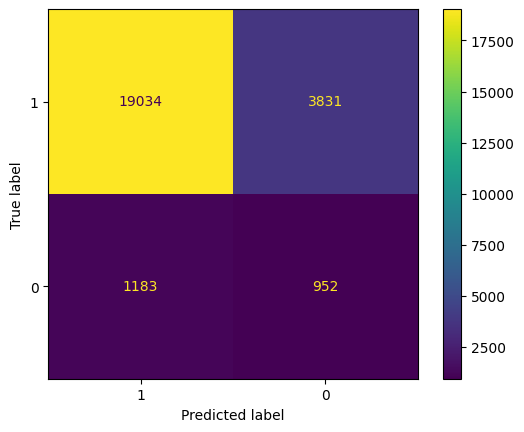

In [109]:
y_pred2=model2.predict(x_test)
out=[1,0]
cndis2=ConfusionMatrixDisplay(cnn2,display_labels=out)
cndis2.plot()

In [115]:
import joblib
joblib.dump(model2, '/content/drive/MyDrive/Colab Notebooks/DATASET/flightdelay.pkl')

['/content/drive/MyDrive/Colab Notebooks/DATASET/flightdelay.pkl']

In [116]:
model_crt = joblib.load('/content/drive/MyDrive/Colab Notebooks/DATASET/flightdelay.pkl')

In [ ]:
Month = int(input("Enter Month: "))
DayofMonth = int(input("Enter DayofMonth: "))
DayOfWeek = int(input("Enter DayOfWeek: "))
DepTime = int(input("Enter Depature Time: "))
UniqueCarrier = int(input("Enter UniqueCarrier: "))
Origin = int(input("Enter Origin: "))
Dest = int(input("Enter Destination: "))
Dist= int(input("Enter Distance: "))

In [124]:
model_selection=model_crt.predict([[Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Dist]])
model_selection

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])

In [125]:
if model_selection==1:
  print("Flght Delayed")
else:
  print("Flight Not Delayed")

Flight Not Delayed


In [ ]:
    1.0        28.0        5.0     1828           19.0   174.0  199.0  423